In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### Equalizing the severity frequency

In [20]:

# Loading dataset
data = pd.read_csv('df_without_covid_clean.csv')


data.dropna(subset=['Severity','Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)'], inplace=True)

# Separate data by severity level
severity_1 = data[data['Severity'] == 1]
severity_2 = data[data['Severity'] == 2]
severity_3 = data[data['Severity'] == 3]
severity_4 = data[data['Severity'] == 4]

# Taking 24000 rows from each severity type

sample_size = 6000

sampled_severity_1 = severity_1.sample(n=sample_size, random_state=42)
sampled_severity_2 = severity_2.sample(n=sample_size, random_state=42)
sampled_severity_3 = severity_3.sample(n=sample_size, random_state=42)
sampled_severity_4 = severity_4.sample(n=sample_size, random_state=42)

final_sampled_data = pd.concat([sampled_severity_1, sampled_severity_2, sampled_severity_3, sampled_severity_4], ignore_index=True)

final_sampled_data = final_sampled_data.sample(frac=1, random_state=42)

final_sampled_data.to_csv('sampled_accident_data.csv', index=False)


# Data Models

### Linear Regression

Mean Squared Error: 1.0274843523882349


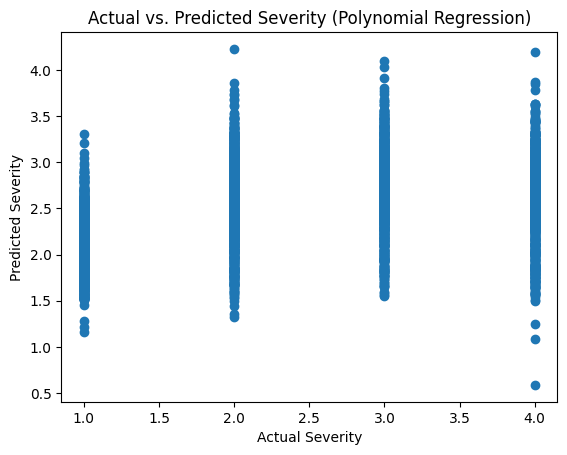

In [21]:
data = final_sampled_data

features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
target = 'Severity'


X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Degree
degree = 1 
poly = PolynomialFeatures(degree=degree)

#Train the model
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#Plot

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Severity")
plt.ylabel("Predicted Severity")
plt.title("Actual vs. Predicted Severity (Polynomial Regression)")
plt.show()

### Polynomial Regression

#### degree = 2

Mean Squared Error: 0.9748283458588556


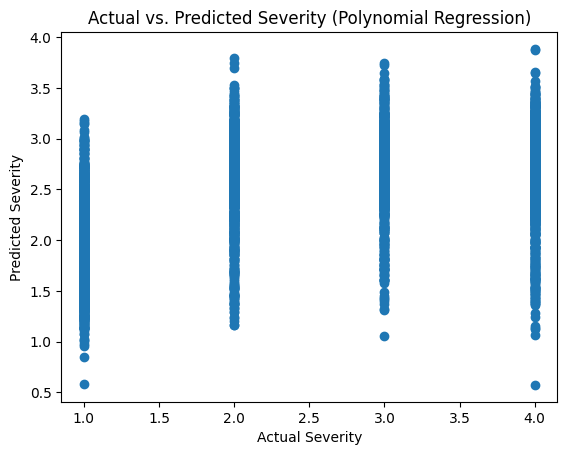

In [22]:
features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
target = 'Severity'


X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

degree = 2  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Severity")
plt.ylabel("Predicted Severity")
plt.title("Actual vs. Predicted Severity (Polynomial Regression)")
plt.show()

#### degree = 3

Mean Squared Error: 0.9640866934404752


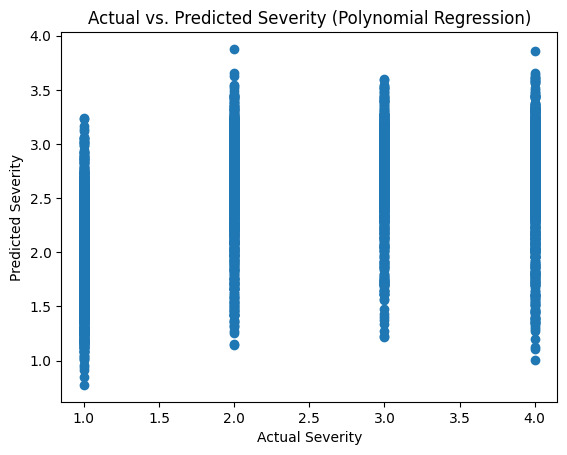

In [23]:

features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
target = 'Severity'


X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

degree = 3  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Severity")
plt.ylabel("Predicted Severity")
plt.title("Actual vs. Predicted Severity (Polynomial Regression)")
plt.show()

### Random Forest Regressor

Mean Squared Error: 0.7932405718136787


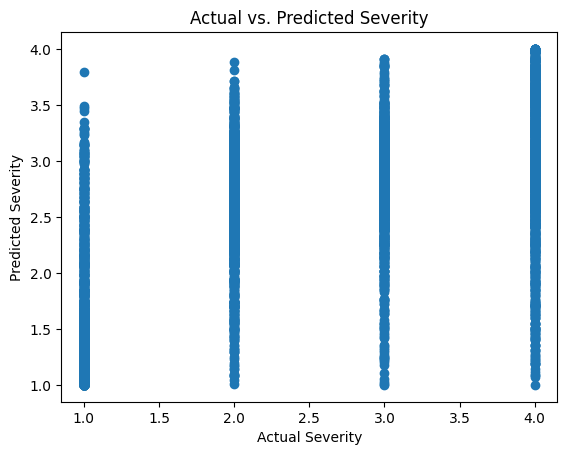

In [24]:

features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
target = 'Severity'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Severity")
plt.ylabel("Predicted Severity")
plt.title("Actual vs. Predicted Severity")
plt.show()


### Random Forest Classifier

Accuracy: 0.520625
Confusion Matrix:
[[975  86  48  62]
 [186 437 356 239]
 [101 314 536 254]
 [148 260 247 551]]


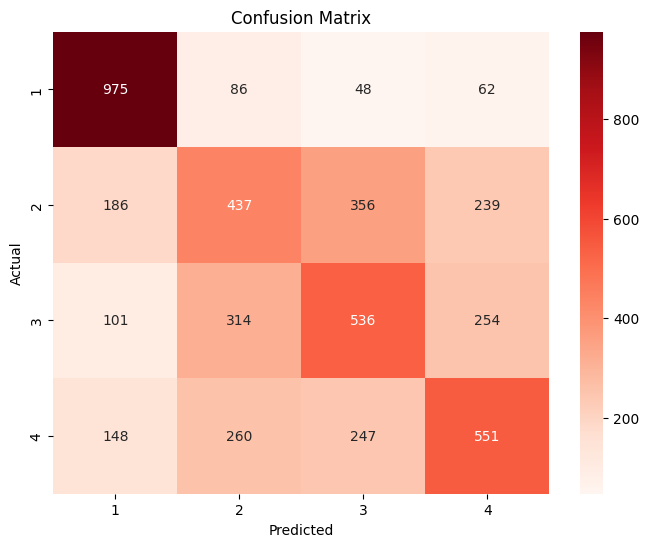

In [25]:

features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
target = 'Severity'

X = data[features]
y = data[target]

severity_mapping = {1: 1, 2: 2, 3: 3, 4: 4}
y = y.map(severity_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=severity_mapping.values(), yticklabels=severity_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Support Vector Machines

Accuracy: 0.421875
Confusion Matrix:
[[841  64  47 219]
 [207 159 416 436]
 [122 118 460 505]
 [205 108 328 565]]


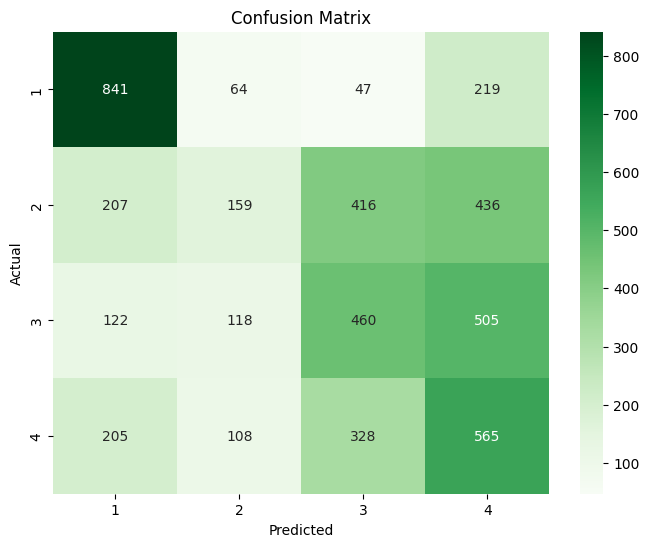

In [26]:

features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
target = 'Severity'

data.dropna(subset=features + [target], inplace=True)

X = data[features]
y = data[target]

severity_mapping = {1: 1, 2: 2, 3: 3, 4: 4}
y = y.map(severity_mapping)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

model = SVC(kernel='linear', random_state=18)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=severity_mapping.values(), yticklabels=severity_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
